In [1]:
import pandas as pd

file_path = "Supplemental Material.xlsx"

In [2]:
sheets_dict = pd.read_excel(file_path, sheet_name=None)
for sheet_name, dataframe in sheets_dict.items():
  print(dataframe.head())

                                               Tweet  \
0  Tesla Cybertruck (pressurized edition) will be...   
1  Oh noooo. The windows actually breaking on the...   
2  WOW. The base model Tesla Cybertruck will be $...   
3  I’ve wanted a truck for yearssss. Was really h...   
4  CyberTruck is wild. Like super weird. On one h...   

                     Category         Username Date Posted  \
0     C3 - Trolls/Humour/Meme        @elonmusk  2019-11-21   
1     C4 - Negative Reactions  @JessicaBlevins  2019-11-21   
2  C1 - Positive Appreciation       @SandhuMMA  2019-11-21   
3       C2 -Critical Feedback  @JessicaBlevins  2019-11-21   
4  C1 - Positive Appreciation           @MKBHD  2019-11-22   

   Engagement(Retweets)  Engagement(Likes)  Engagement(Replies)  \
0                  9800             106000                 2000   
1                    25               1800                   19   
2                   348               2000                   39   
3                    4

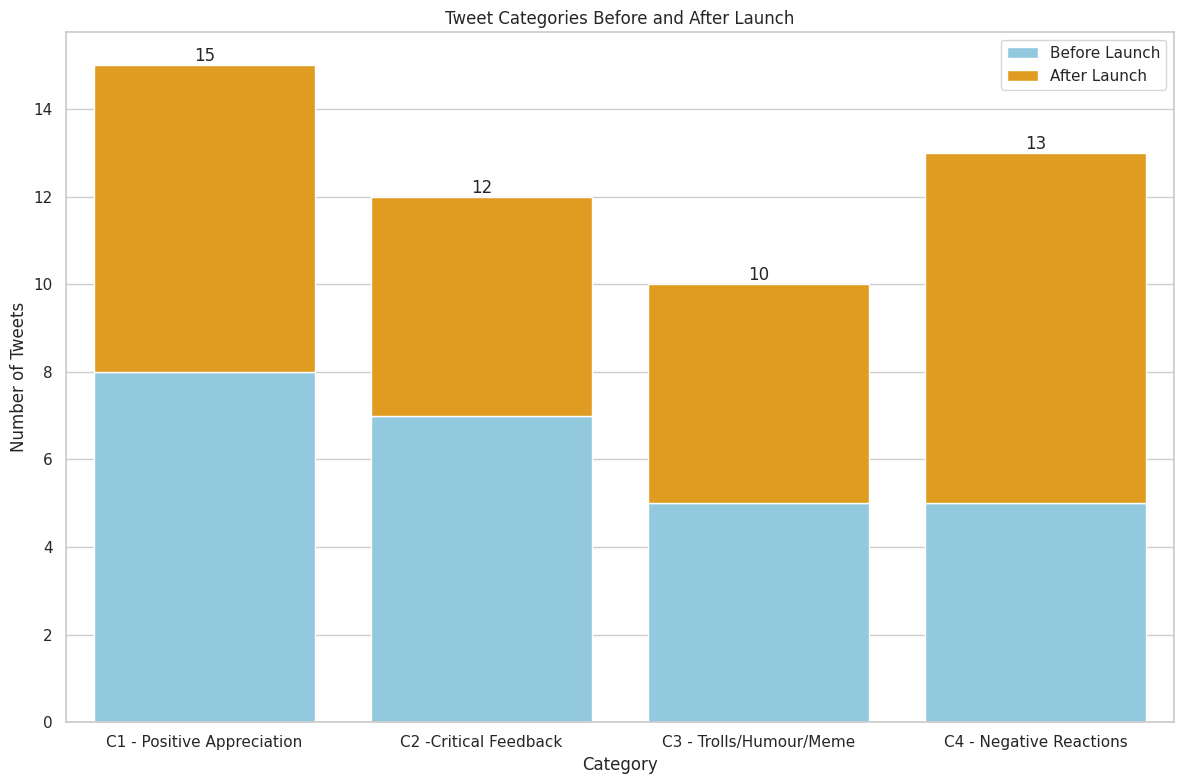

In [3]:
import matplotlib.pyplot as pltimport seaborn as sns# Read the data from Excel sheetstweets_before_launch = pd.read_excel('Supplemental Material.xlsx', sheet_name=0)tweets_after_launch = pd.read_excel('Supplemental Material.xlsx', sheet_name=1)# Count the occurrences of each category for both subsetscategories_before = tweets_before_launch['Category'].value_counts()categories_after = tweets_after_launch['Category'].value_counts()unique_categories = sorted(set(categories_before.index) | set(categories_after.index))# Fill missing categories with 0 countcategories_before = categories_before.reindex(unique_categories, fill_value=0)categories_after = categories_after.reindex(unique_categories, fill_value=0)# Create a stacked bar chartplt.figure(figsize=(12, 8))sns.set(style="whitegrid")# Plot the bar chartsns.barplot(x=unique_categories, y=categories_before, color='skyblue', label='Before Launch')sns.barplot(x=unique_categories, y=categories_after, bottom=categories_before, color='orange', label='After Launch')# Display numbers on top of barsfor i, (before, after) in enumerate(zip(categories_before, categories_after)):    plt.text(i, before + after, f'{before + after}', ha='center', va='bottom')# Plottingplt.title('Tweet Categories Before and After Launch')plt.xlabel('Category')plt.ylabel('Number of Tweets')plt.legend()plt.tight_layout()plt.show()

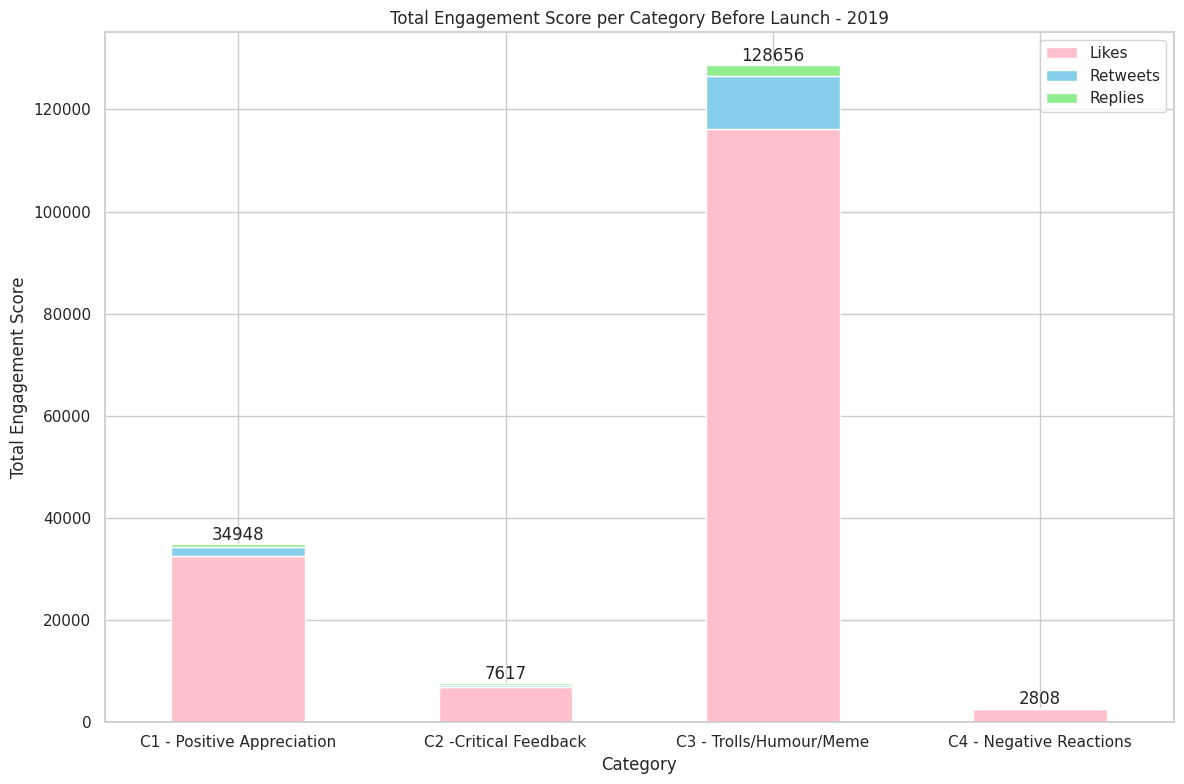

In [59]:
# Calculate total engagement score for each category and each metric
total_likes_per_category = tweets_before_launch.groupby('Category')['Engagement(Likes)'].sum()
total_retweets_per_category = tweets_before_launch.groupby('Category')['Engagement(Retweets)'].sum()
total_replies_per_category = tweets_before_launch.groupby('Category')['Engagement(Replies)'].sum()

# Combine the data into a single DataFrame
total_engagement_per_category = pd.DataFrame({
    'Likes': total_likes_per_category,
    'Retweets': total_retweets_per_category,
    'Replies': total_replies_per_category
})

fig, ax = plt.subplots(figsize=(12, 8))
total_engagement_per_category.plot(kind='bar', stacked=True, color=['pink', 'skyblue', 'lightgreen'], ax=ax)
total_score_per_category = total_engagement_per_category.sum(axis=1)

# Add total engagement score above each bar
for index, total_score in enumerate(total_score_per_category):
    ax.text(index, total_score + 10, str(round(total_score, 2)), ha='center', va='bottom')

# Plotting
ax.set_title('Total Engagement Score per Category Before Launch - 2019')
ax.set_xlabel('Category')
ax.set_ylabel('Total Engagement Score')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

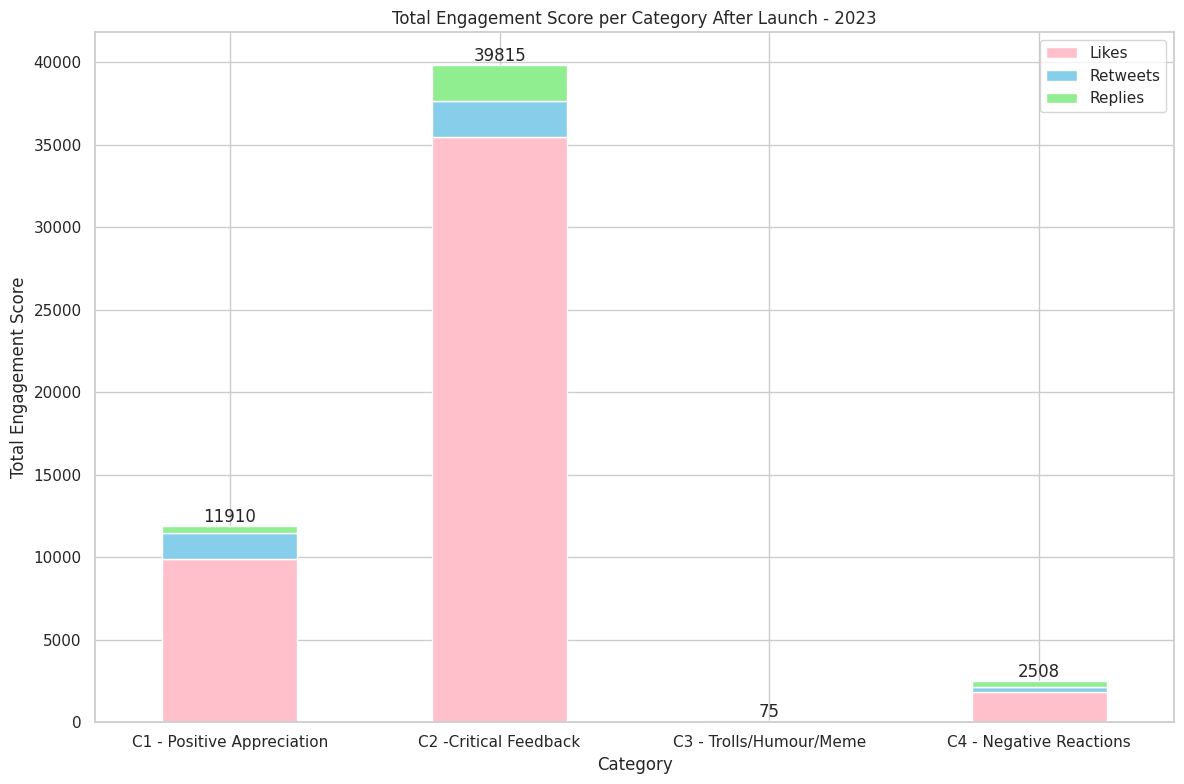

In [58]:
# Calculate total engagement score for each category and each metric
total_likes_per_category = tweets_after_launch.groupby('Category')['Engagement(Likes)'].sum()
total_retweets_per_category = tweets_after_launch.groupby('Category')['Engagement(Retweets)'].sum()
total_replies_per_category = tweets_after_launch.groupby('Category')['Engagement(Replies)'].sum()

# Combine the data into a single DataFrame
total_engagement_per_category = pd.DataFrame({
    'Likes': total_likes_per_category,
    'Retweets': total_retweets_per_category,
    'Replies': total_replies_per_category
})

fig, ax = plt.subplots(figsize=(12, 8))
total_engagement_per_category.plot(kind='bar', stacked=True, color=['pink', 'skyblue', 'lightgreen'], ax=ax)
total_score_per_category = total_engagement_per_category.sum(axis=1)

# Add total engagement score above each bar
for index, total_score in enumerate(total_score_per_category):
    ax.text(index, total_score + 10, str(round(total_score, 2)), ha='center', va='bottom')

# Plotting
ax.set_title('Total Engagement Score per Category After Launch - 2023')
ax.set_xlabel('Category')
ax.set_ylabel('Total Engagement Score')
plt.setp(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()